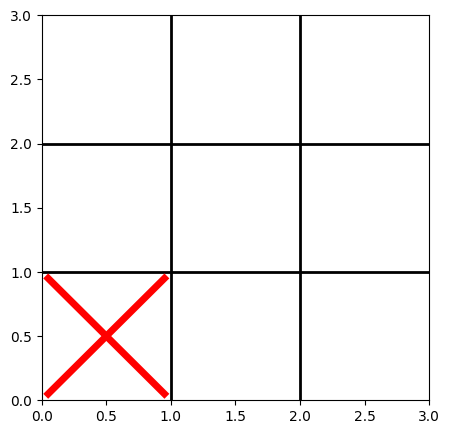

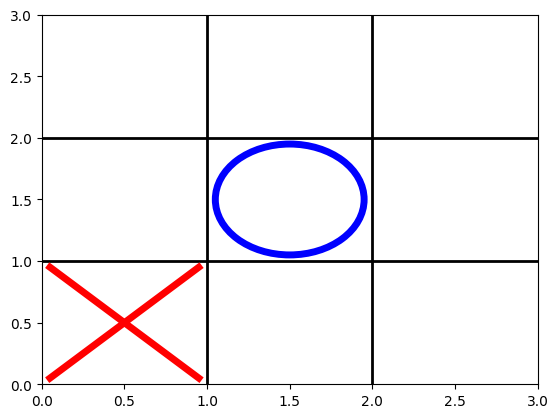

KeyboardInterrupt: Interrupted by user

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def draw_cross(x, y, taille=0.9, couleur='red', epaisseur=5):
    """Dibuja una cruz (X) en la posición dada"""
    offset = taille / 2
    plt.plot([x - offset, x + offset], [y - offset, y + offset], color=couleur, lw=epaisseur)
    plt.plot([x - offset, x + offset], [y + offset, y - offset], color=couleur, lw=epaisseur)

def draw_cercle(x, y, taille=0.9, couleur='blue', epaisseur=5):
    """Dibuja un círculo (O) en la posición dada"""
    cercle = plt.Circle((x, y), radius=taille / 2, edgecolor=couleur, facecolor='none', lw=epaisseur)
    plt.gca().add_patch(cercle)

def draw_board():
    """Dibuja el tablero de juego de Tic-Tac-Toe"""
    # plt.figure(figsize=(5, 5))
    # plt.axis('off')

    # Dibujar las líneas del tablero
    for i in range(1, 3):
        plt.plot([0, 3], [i, i], 'k', lw=2)  # Líneas horizontales
        plt.plot([i, i], [0, 3], 'k', lw=2)  # Líneas verticales

    plt.xlim(0, 3)
    plt.ylim(0, 3)

def draw_mark(x, y, mark='X'):
    """Dibuja una cruz o un círculo en la posición especificada."""
    if mark == 'X':
        draw_cross(x + 0.5, y + 0.5)  # Ajustar la posición para centrar el marcador
    elif mark == 'O':
        draw_cercle(x + 0.5, y + 0.5)

def is_winner(board, mark):
    """Verifica si el jugador ha ganado"""
    # Verificar filas y columnas
    for i in range(3):
        if np.all(board[i, :] == mark) or np.all(board[:, i] == mark):
            return True

    # Verificar diagonales
    if np.all(np.diag(board) == mark) or np.all(np.diag(np.fliplr(board)) == mark):
        return True

    return False
def is_board_full(board):
    """Verifica si el tablero de tic-tac-toe está completamente lleno.
    Args:
        board (np.array): Una matriz NumPy que representa el tablero de juego.
    Returns:
        bool: True si todas las casillas del tablero están ocupadas, False en caso contrario.
    """
    return np.all(board != '')

def play_game():
    plt.ion()
    plt.figure(figsize=(5, 5))
    plt.axis('off')

    board = np.zeros((3, 3), dtype=str)
    player = 'X'
    draw_board()

    while True:
        while True:
            try:
                row, col = map(int, input("Entrez la ligne et la colonne (1-3): ").split())
                row -= 1
                col -= 1
                if 0 <= row <= 2 and 0 <= col <= 2:
                    break
                else:
                    print("nombres de 1 à 3.")
            except ValueError:
                print("nombres entiere.")

        if board[row, col] != '':
            print("Casee ocupée.")
            continue

        board[row, col] = player
        plt.clf()
        #ax.clear()
        draw_board()
        for i in range(3):
            for j in range(3):
                if board[i, j] == 'X':
                    draw_cross(j + 0.5, i + 0.5)
                elif board[i, j] == 'O':
                    draw_cercle(j + 0.5, i + 0.5)
        plt.pause(0.1)
        #plt.show()
        if is_winner(board, player):
            print(f"¡Le jeur {player} ha gagne!")
            break
        elif is_board_full(board):
            print("¡égalité!")
            break

        player = 'O' if player == 'X' else 'X'
    plt.ioff()  # Desactive
    plt.show() 

play_game()

